In [289]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.cm import get_cmap
import seaborn as sns

from shapely.geometry import Polygon, MultiPolygon

import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

# Set figure stile and size for entire notebook
sns.set_style("ticks")
#plt.rcParams["figure.figsize"] = (7,4)

In [290]:
# Import dataset 
df = pd.read_csv("../data/world-happiness-report-2024.txt")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [291]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [292]:
df.country_name.nunique()

165

In [293]:
np.sort(df.year.unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [294]:
# Data Frame only for 2023
df_2023 = df.query('year == 2023').sort_values(by='life_ladder', ascending=False)

In [295]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.replace(['Bosnia and Herz.'],'Bosnia and Herzegovina')
world = world.replace(['United States of America'],'United States')
world = world.replace(['Dominican Rep.'],'Dominican Republic')
world = world.replace(['Taiwan'],'Taiwan Province of China')
world = world.replace(['Palestine'],'State of Palestine')
#europe = world.query("continent == 'Europe'")
europe = world[world.continent == 'Europe']

/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_1289/2662238444.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [296]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [297]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [298]:
europe.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 39 entries, 18 to 174
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     39 non-null     float64 
 1   continent   39 non-null     object  
 2   name        39 non-null     object  
 3   iso_a3      39 non-null     object  
 4   gdp_md_est  39 non-null     int64   
 5   geometry    39 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 2.1+ KB


In [299]:
europe.name.unique()

array(['Russia', 'Norway', 'France', 'Sweden', 'Belarus', 'Ukraine',
       'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania',
       'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Albania',
       'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands',
       'Portugal', 'Spain', 'Ireland', 'Italy', 'Denmark',
       'United Kingdom', 'Iceland', 'Slovenia', 'Finland', 'Slovakia',
       'Czechia', 'Bosnia and Herzegovina', 'North Macedonia', 'Serbia',
       'Montenegro', 'Kosovo'], dtype=object)

In [300]:
# Exclude French Guiana (Französisch Guayana) from the map (also Corsika though) 
tmp = [x.replace(')','') for x in str(europe.loc[43,'geometry']).split('((')[1:]][1]
tmp2 = [x.split(' ') for x in tmp.split(', ')][:-1]
tmp3 = [(float(x[0]),float(x[1])) for x in tmp2]
France_mainland = Polygon(tmp3)
europe.loc[europe['name']=='France','geometry'] = France_mainland 

In [301]:
# Exclude Svalbard (Norway) from the map 
norw = [x.replace(')','') for x in str(europe.loc[21,'geometry']).split('((')[1:]][1]
norw2 = [x.split(' ') for x in norw.split(', ')][:-1]
norw3 = [(float(x[0]),float(x[1])) for x in norw2]
Norway_mainland = Polygon(norw3)
europe.loc[europe['name']=='Norway','geometry'] = Norway_mainland 

In [302]:
# merge two data frames
europe_capstone = europe.merge(df_2023, left_on=['name'], right_on=['country_name'], how='left')

In [303]:
# Exclude Russia from the map
europe_capstone.drop(index = europe_capstone[europe_capstone['name']=='Russia'].index, inplace=True)

In [304]:
europe_capstone.query('country_name.isnull()') # no Data for these countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
europe_capstone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   pop_est                           38 non-null     float64 
 1   continent                         38 non-null     object  
 2   name                              38 non-null     object  
 3   iso_a3                            38 non-null     object  
 4   gdp_md_est                        38 non-null     int64   
 5   geometry                          38 non-null     geometry
 6   country_name                      37 non-null     object  
 7   year                              37 non-null     float64 
 8   life_ladder                       37 non-null     float64 
 9   log_gdp_per_capita                37 non-null     float64 
 10  social_support                    37 non-null     float64 
 11  healthy_life_expectancy_at_birth  36 non-null     fl

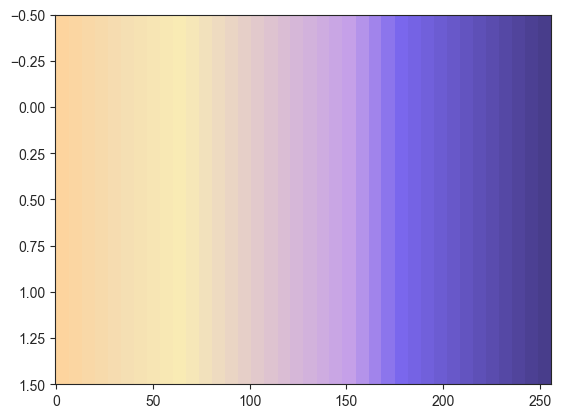

In [306]:
# creating color map
ccolors = [(0, "#fdd49e"), (0.125, "wheat"), (0.25, "#faecb5"), (0.6, "#c59fe9"), (0.7, "mediumslateblue"),  (0.8, "slateblue"), (1, "darkslateblue")] # (0.5, "thistle"), (0.375, "lightyellow"),
col_cap = colors.LinearSegmentedColormap.from_list("", ccolors, N=len(europe_capstone), gamma=1.0)
sns.set_palette(col_cap(np.linspace(0,1,col_cap.N)))



gradient = np.linspace(0.0, 1.0, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect="auto", cmap=col_cap)
plt.show()

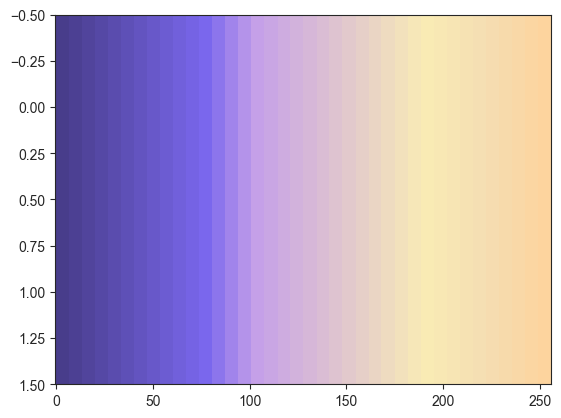

In [307]:
# create reversing colormap
col_cap_r = col_cap.reversed()
plt.imshow(gradient, aspect="auto", cmap=col_cap_r)
plt.show()

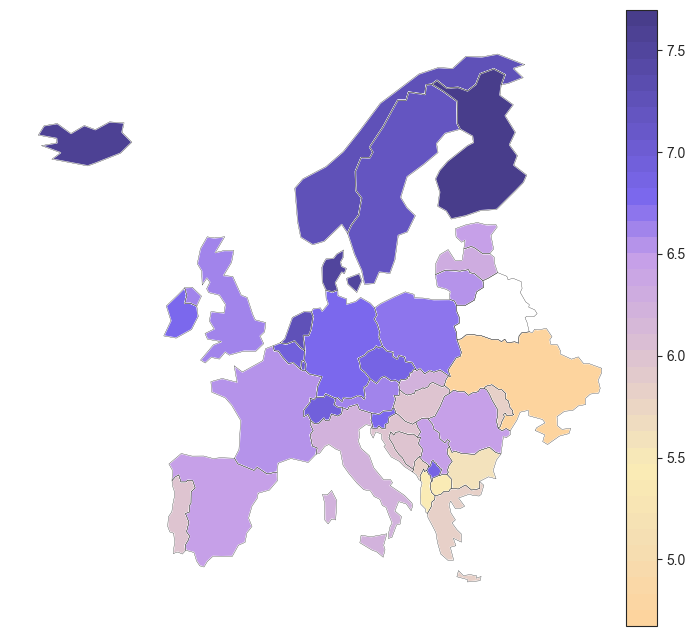

In [308]:
ax = europe_capstone.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 10))
europe_capstone.plot(ax=ax, column='life_ladder', legend=True, cmap=col_cap, legend_kwds={'shrink':0.8, 
                                                                                'orientation':'vertical',
                                                                                'anchor': (-0.5, 0.5), # default (0.0, 0.5) if vertical
                                                                                'format':'%.1f'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
#ax.set_title('Life Ladder in Europe in 2023', size=20, weight='bold')
plt.show();

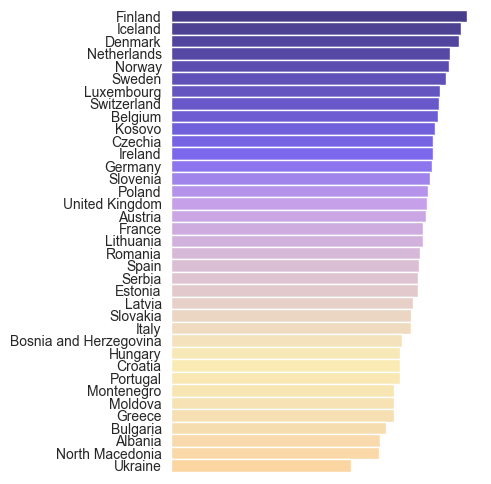

In [309]:
plt.figure(figsize=(4,6))
ax = sns.barplot(data=europe_capstone.sort_values(by='life_ladder', ascending=False),
            x='life_ladder', 
            y='country_name',
            palette=col_cap_r(np.linspace(0, 1, col_cap_r.N)),
            width=1.,
            saturation=1)

ax.set_xlabel("")
ax.set_ylabel("")

ax.set(xticklabels=[]) # remove tick labels
ax.tick_params(bottom=False) #remove the ticks

#ax.set(yticklabels=[]) # remove tick labels
ax.tick_params(left=False) #remove the ticks

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False);

### **World**

In [310]:
# merge two data frames
world_capstone = world.merge(df_2023, left_on=['name'], right_on=['country_name'], how='left')

In [311]:
# Exclude Antarctica and Greenland from the map
world_capstone.drop(index = world_capstone[world_capstone['continent']=='Antarctica'].index, inplace=True)
world_capstone.drop(index = world_capstone[world_capstone['name']=='Greenland'].index, inplace=True)

In [312]:
world_capstone.query('country_name.isnull()')

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


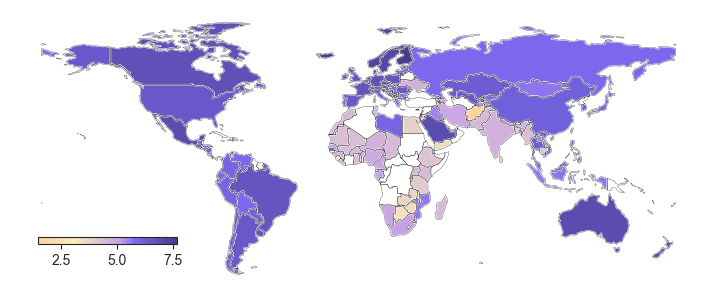

In [313]:
ax = world_capstone.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(9, 5.5))
world_capstone.plot(ax=ax, column='life_ladder', legend=True, cmap=col_cap, legend_kwds={'shrink':0.2, 
                                                                                'orientation':'horizontal',
                                                                                'anchor': (0.05, 3.), # default (0.0, 0.5) if vertical
                                                                                'format':'%.1f'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
#ax.set_title('Life Ladder World, 2023', size=20, weight='bold')
plt.show();

### Compare top 10 2022 vs 2023

In [314]:
df_2023_10 = df.query('year == 2023').sort_values(by='life_ladder', ascending=False).iloc[:10]
df_2022_10 = df.query('year == 2022').sort_values(by='life_ladder', ascending=False).iloc[:10] 

In [315]:
result = pd.concat([df_2023_10, df_2022_10], axis=0)
result.sort_values(by='year', ascending=False)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
680,Finland,2023,7.699,10.808,0.947,71.300,0.943,-0.001,0.185,0.717,0.173
556,Denmark,2023,7.504,10.996,0.916,71.500,0.923,0.089,0.184,0.757,0.229
490,Costa Rica,2023,7.384,10.021,0.875,70.000,0.933,-0.067,0.767,0.806,0.282
1498,Netherlands,2023,7.255,10.977,0.915,71.700,0.847,0.223,0.424,0.693,0.202
1594,Norway,2023,7.249,11.125,0.952,71.600,0.938,0.219,0.245,0.756,0.228
2004,Sweden,2023,7.161,10.902,0.927,72.400,0.926,0.147,0.253,0.739,0.194
1129,Kuwait,2023,7.130,10.812,0.890,70.000,0.898,0.136,NaN,0.729,0.207
97,Australia,2023,7.025,10.846,0.896,71.200,0.876,0.187,0.482,0.731,0.248
1249,Luxembourg,2023,7.016,11.649,0.879,71.700,0.911,0.033,0.343,0.751,0.194
886,Iceland,2023,7.562,10.934,0.979,72.100,0.918,0.299,0.697,0.793,0.185


In [316]:
palette_capstone = ['gold', 'mediumslateblue']

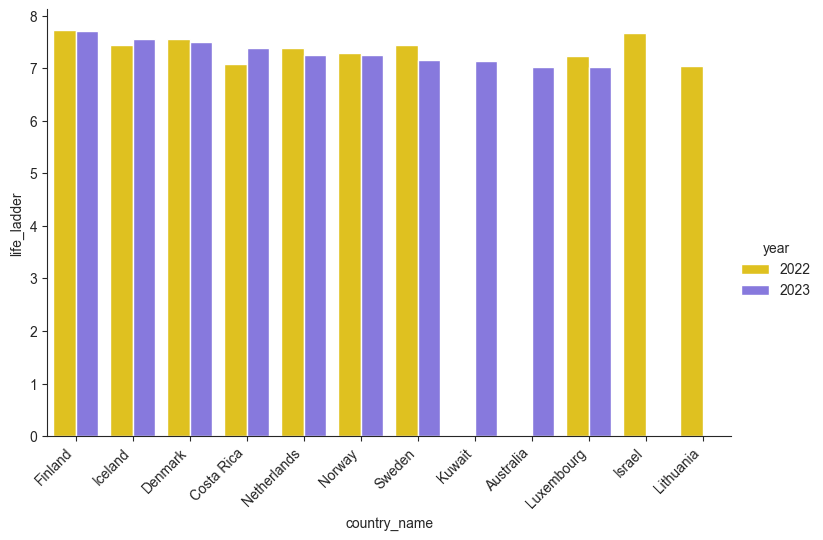

In [317]:
g = sns.catplot(data=result, x='country_name', y='life_ladder', hue='year',  kind='bar', height=5, aspect=1.5, palette=palette_capstone)
plt.xticks(rotation=45, ha='right');